#Fake news classification using Machine Learning
The phenomenon of Fake news is experiencing a rapid and growing progress with the evolution of the means of communication and Social media. Fake news detection is an emerging research area which is gaining big interest.We consume news through several mediums throughout the day in our daily routine, but sometimes it becomes difficult to decide which one is fake and which one is authentic. Our job is to create a model which predicts whether a given news is real or fake.

### Required Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install ipykernel --upgrade


  Using cached ipykernel-6.25.0-py3-none-any.whl (153 kB)
  Using cached jupyter_core-5.3.1-py3-none-any.whl (93 kB)
  Using cached comm-0.1.3-py3-none-any.whl (6.6 kB)
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter_core 4.11.1
    Uninstalling jupyter_core-4.11.1:
      Successfully uninstalled jupyter_core-4.11.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.15.2
    Uninstalling ipykernel-6.15.2:
      Successfully uninstalled ipykernel-6.15.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.7.3 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
import codecs
import csv

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Soumapriyo
[nltk_data]    |     Mondal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Soumapriyo
[nltk_data]    |     Mondal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Soumapriyo
[nltk_data]    |     Mondal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Soumapriyo
[nltk_data]    |     Mondal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_gram

In [107]:
#ml
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import xgboost as xgb
from sklearn import tree
from xgboost import XGBClassifier
import multiprocessing

In [108]:
sns.set_theme()

### Data Gathering


In [153]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [154]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [155]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [156]:
test_label=pd.read_csv('submit.csv')
test_label.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [157]:
len(test)

5200

In [158]:
len(test_label)

5200

### Data Analysis

In [159]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [160]:
#real vs fake
fake_real=pd.DataFrame(train['label'].value_counts())
fake_real

,label
1,10413
0,10387


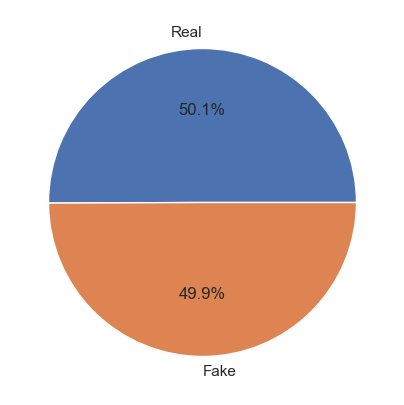

In [161]:
plt.figure(figsize=(5, 5))
categories = ['Real','Fake']
plt.pie(fake_real.label,labels=categories,autopct='%1.1f%%')
plt.show()

In [162]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [163]:
#drop all rows with null text column as its main source
train =train.dropna(subset=['text'])

In [164]:
#fill all rows with null
test=test.fillna('unknown')
train=train.fillna('unknown')
test['news']=test['title']+' '+test['author']+' '+test['text']
train['news']=train['title']+' '+train['author']+' '+train['text']

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**We can now show a word cloud for all words fake and real wordcloud**

In [121]:
from wordcloud import WordCloud, STOPWORDS

In [122]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS)
for val in train[train['label']==1].news:
    tokens = [token.lower() for token in val.split()]
    real_words += " ".join(tokens)+" "
for val in train[train['label']==0].news:
    tokens = [token.lower() for token in val.split()]
    fake_words += " ".join(tokens)+" "

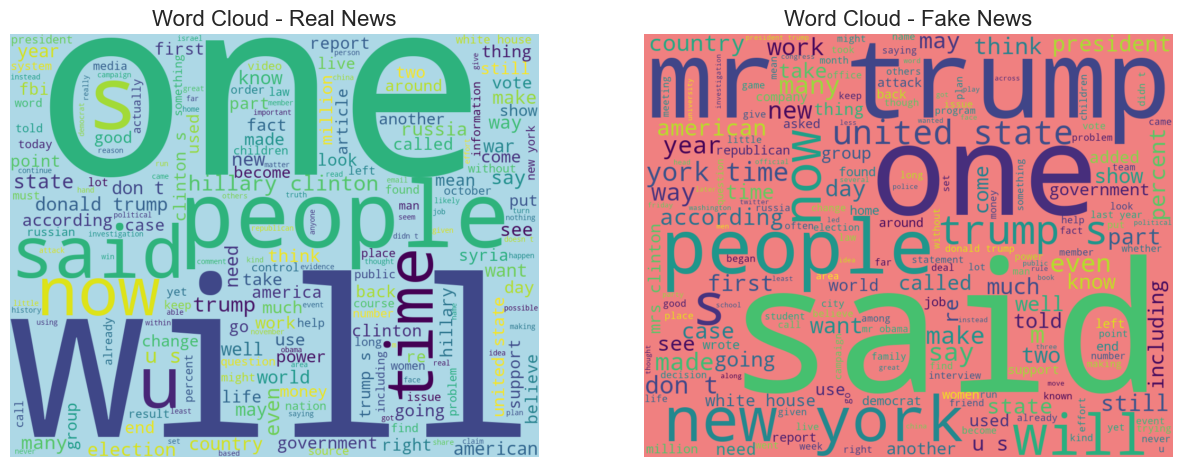

In [123]:
wordcloud_real = WordCloud(width=1000, height=800, 
                          background_color='lightblue', 
                          stopwords=stopwords, 
                          min_font_size=10).generate(real_words)
wordcloud_fake = WordCloud(width=1000, height=800, 
                          background_color='lightcoral', 
                          stopwords=stopwords, 
                          min_font_size=10).generate(fake_words)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real News', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News', fontsize=16)
plt.axis('off')

plt.show()

## APPLY:

*   Regex
*   Tokenization
*   StopWords
*   Lemmatization



In [165]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\Soumapriyo
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Soumapriyo
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Soumapriyo
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [166]:
lemmatizer=WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and non-word characters
    words = nltk.word_tokenize(text.lower())  # Tokenization and lowercase conversion
    stop_words = set(stopwords.words('english'))
    stop_words.discard('no')  # Remove 'no' from the set of stopwords
    stop_words.discard('not')  # Remove 'not' from the set of stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Stopwords removal and lemmatization
    return ' '.join(words)

In [167]:
train['news'] = train['news'].apply(preprocess_text)

In [168]:
train.head()

,id,title,author,text,label,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired consortiumnewscom truth ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilian killed single u airstrike identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...


In [171]:
len(train.news)

20761

In [172]:
test.head()

,id,title,author,text,news
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [207]:
X=train['news'].values
Y=train['label'].values

In [188]:
test['news'] = test['news'].apply(preprocess_text)

In [191]:
test

,id,title,author,text,news
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",specter trump loosens tongue not purse string ...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near al...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl native american leader vow stay winter ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",tim tebow attempt another comeback time baseba...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e995 truth broadcast ne...
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,bangladeshi traffic jam never end new york tim...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,john kasich sign one abortion bill ohio veto r...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,california today exactly sushi new york time m...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,300 u marine deployed russian border norway pr...


In [209]:
testX=test['news'].values
testY=test_label['label'].values

### Vectorization

In [210]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(X)
testX=vectorizer.transform(testX)

### Model

In [216]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [217]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    "PassiveAgreesive Classifier" : PassiveAggressiveClassifier()
}

Random Forest - Confusion Matrix:
[[2951  105]
 [ 366 2807]]


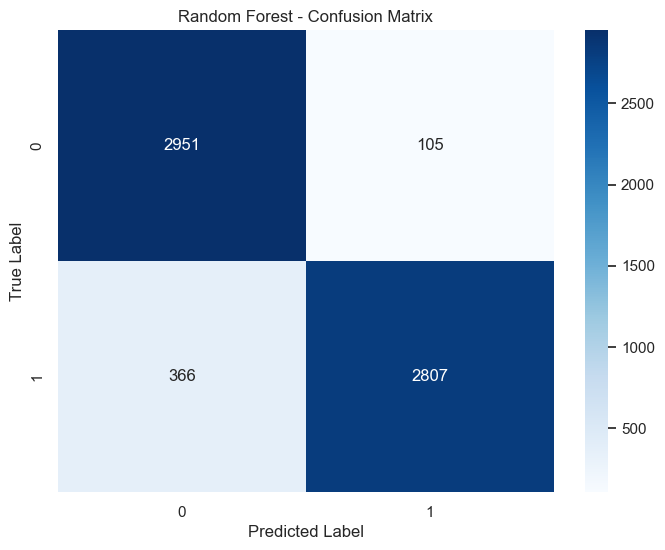

XGBoost - Confusion Matrix:
[[2988   68]
 [  62 3111]]


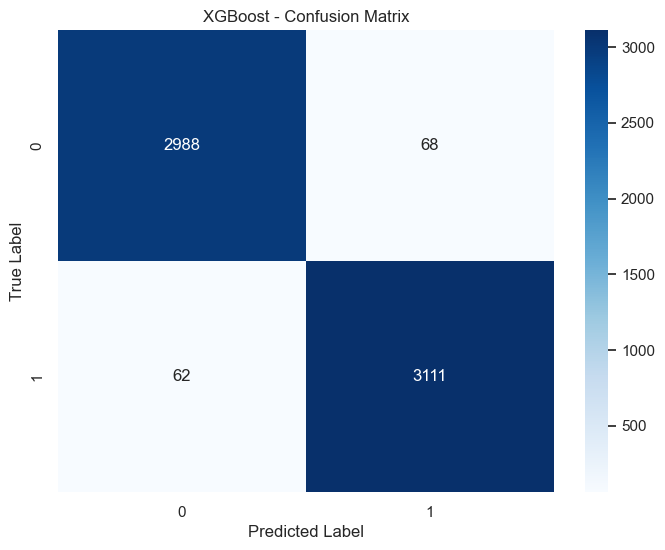

Multinomial Naive Bayes - Confusion Matrix:
[[3050    6]
 [1176 1997]]


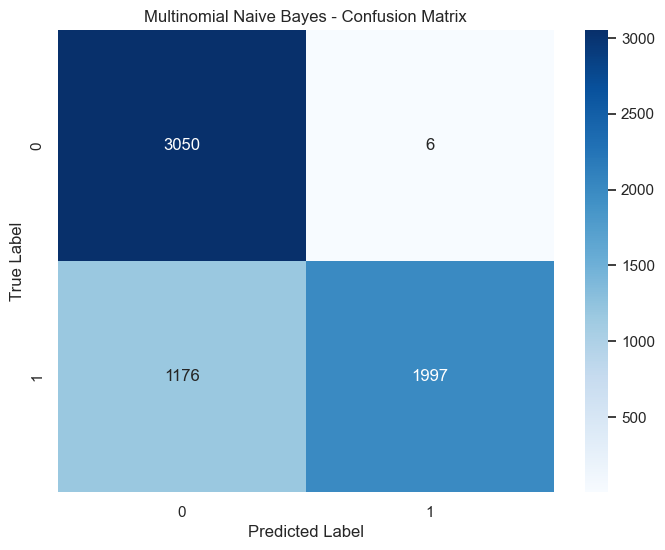

PassiveAgreesive Classifier - Confusion Matrix:
[[2958   98]
 [  87 3086]]


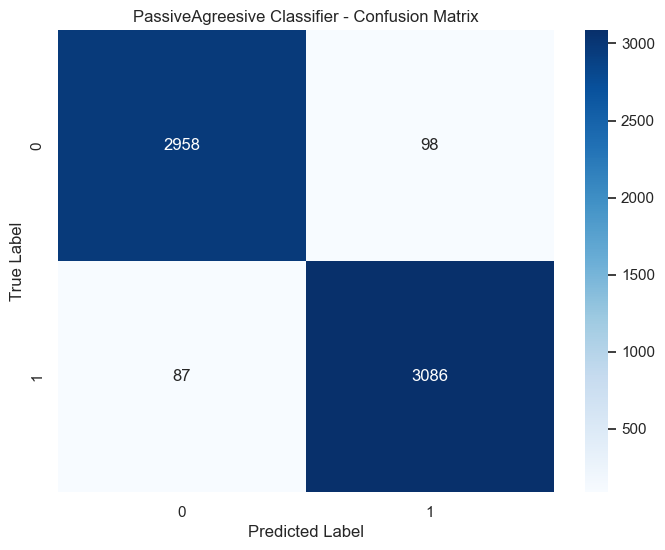

In [218]:
import copy
results_dict = {
    "Model Name": [],
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1 Score": [],
    "Test F1 Score": []
}

for algo_name, model in classifiers.items():
    model.fit(x_train, y_train)

    # predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # accuracy performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_test_accuracy = accuracy_score(y_test, y_test_pred)

    # F1 score
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)

    # Save results to the dictionary
    results_dict["Model Name"].append(algo_name)
    results_dict["Model"].append(copy.deepcopy(model))
    results_dict["Train Accuracy"].append(model_train_accuracy)
    results_dict["Test Accuracy"].append(model_test_accuracy)
    results_dict["Train F1 Score"].append(model_train_f1)
    results_dict["Test F1 Score"].append(model_test_f1)

    # Confusion matrix
    print(f"{algo_name} - Confusion Matrix:")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{algo_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [219]:
results_df = pd.DataFrame(results_dict).sort_values(by='Test Accuracy',ascending=False)
results_df

,Model Name,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
1,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.999931,0.979130,0.999931,0.979534
3,PassiveAgreesive Classifier,PassiveAggressiveClassifier(),1.000000,0.970300,1.000000,0.970898
0,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.924386,1.000000,0.922597
2,Multinomial Naive Bayes,MultinomialNB(),0.869461,0.810242,0.848543,0.771638


Conclusion: We will use XGBoost for the Submission.We should fcous on f1 score with the accuracy here because FP and FN would be a big issue for for fake news classifier. 

#### Hyperparameter tuning 

In [215]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],            # Learning rate
    'max_depth': [3, 4, 5, 6, 7],                     # Maximum depth of the tree
    'min_child_weight': [1, 3, 5, 7],      
    'booster': ['gbtree', 'gblinear'],                # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],           # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],   # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3],                     # Minimum loss reduction required to make a further partition on a leaf node
    'n_estimators': [100, 150, 200, 250, 300, 400]        # Number of trees (boosting rounds)
}

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, cv=3, scoring='f1', random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'subsample': 0.8, 'n_estimators': 250, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


Test Accuracy: 0.992936265853267
Test F1 Score: 0.9930730478589419
[[3031   25]
 [  19 3154]]


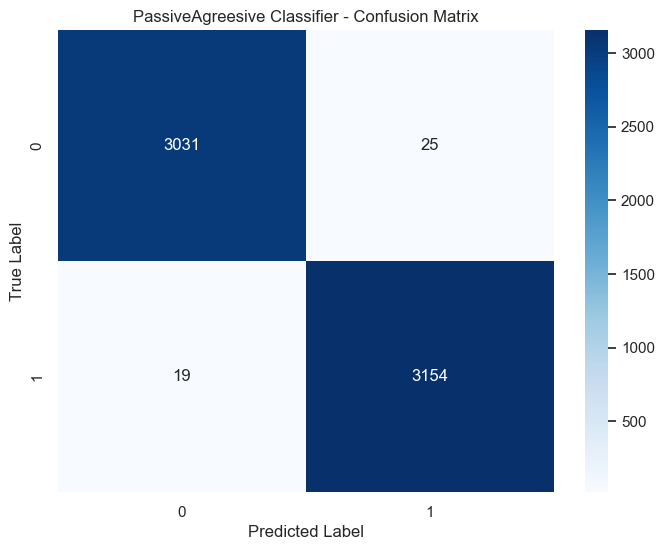

In [220]:
best_xgb = random_search.best_estimator_
y_test_pred = best_xgb.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the test accuracy and F1 score
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{algo_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Test data prediction(kaggle)

In [233]:
kag_pred = pd.DataFrame(best_xgb.predict(testX))
kag_pred.to_csv('sub.csv')
x=pd.read_csv('sub.csv',index_col="Unnamed: 0")
x.index=x.index+20800
x.to_csv('fakenews.csv')

### Result 

Public Score: 0.97948
Private Score: 0.97719